In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# data generating
np.random.seed(0) 
N_fold = 10
N_test = 500 
N_train = 1000
N = N_test + N_train
# Specify feature dimensions of X and Y
X_dim = 20
Y_dim = 10
X = np.random.randn(N,X_dim)
# Only have 10 non-zero entries in beta,
nnz = 10
beta = np.zeros((X_dim * Y_dim))
nnz_idx = np.random.choice(X_dim * Y_dim, nnz, replace = False) 
beta[nnz_idx] = np.random.randn(nnz) * 2
beta = beta.reshape(X_dim , Y_dim)
Y = X @ beta + np.random.rand(N, Y_dim)

# Split training and testing set
X_test = X[:N_test] 
Y_test = Y[:N_test] 
X_train = X[N_test:] 
Y_train = Y[N_test:]

In [10]:
# q1 MSE calculator
def MSEC(y,yhat,N):
    return (np.sum((y-yhat)**2))/N

In [69]:
# q1 fit the Lasso regression
from sklearn import linear_model

lamsize = int(0.04/0.001)
lambdaL = np.linspace(0,0.04,num=lamsize)
mselist = np.zeros(lamsize)

for i in range(lamsize):
    lambdav = lambdaL[i]
    clf = linear_model.Lasso(alpha=lambdav)
    clf.fit(X_train,Y_train)
    yhat = clf.predict(X_train)
    msev = MSEC(Y_train,yhat,1000)
    mselist[i] = msev

/var/folders/0l/16z1x7f921x1hdj3spvhldym0000gn/T/ipykernel_9950/3587169375.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_train,Y_train)
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+01, tolerance: 8.381e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV i

Text(0.5, 1.0, 'MSE of Lasso regression vs lambda')

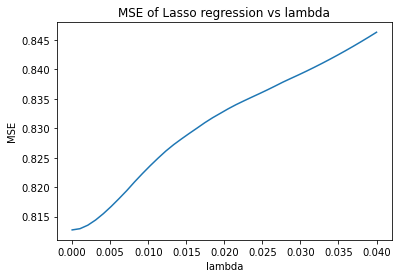

In [72]:
plt.plot(lambdaL,mselist)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE of Lasso regression vs lambda')

In [56]:
# q2 cross validation
from sklearn.model_selection import KFold 

def cross_validation(X_train,Y_train,lambdav):
    mselist = np.zeros(10)
    
    skfolds = KFold(n_splits=10)
    i = 0
    for train_index, test_index in skfolds.split(X_train, Y_train):
        clfc = linear_model.Lasso(alpha=lambdav)
        X_train_folds = X_train[train_index]
        Y_train_folds = Y_train[train_index]
        X_test_fold = X_train[test_index]
        Y_test_fold = Y_train[test_index]
        
        clfc.fit(X_train_folds, Y_train_folds)
        Y_pred = clfc.predict(X_test_fold)
        msev = MSEC(Y_test_fold,Y_pred,len(Y_pred))
        mselist[i] = msev
        i = i + 1
        msem = np.mean(mselist)
    return msem

In [57]:
# q2 implementation
mselist1 = np.zeros(lamsize)
mselist2 = np.zeros(lamsize)

for i in range(lamsize):
    lambdav = lambdaL[i]
    clf = linear_model.Lasso(alpha=lambdav)
    clf.fit(X_train,Y_train)
    yhat = clf.predict(X_test)
    msev1 = MSEC(Y_test,yhat,500)
    mselist1[i] = msev1
    msev2 = cross_validation(X_train,Y_train,lambdav)
    mselist2[i] = msev2

/var/folders/0l/16z1x7f921x1hdj3spvhldym0000gn/T/ipykernel_9950/1572564065.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_train,Y_train)
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+01, tolerance: 8.381e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e+01, tolerance: 7.422e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/var/folders/0l/16z1x7f921x1hdj3spvhldym0000gn/T/ipykernel_9950/128574820.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clfc.fit(X_train_folds, Y_train_folds)
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.443e+01, tolerance: 8.128e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.724e+01, tolerance: 7.671e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+01, tolerance: 3.127e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.537e+01, tolerance: 8.120e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e+01, tolerance: 7.846e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.597e+01, tolerance: 7.292e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.659e+01, tolerance: 7.617e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.719e+01, tolerance: 2.373e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+01, tolerance: 3.043e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lijinnan/.conda/envs/pycourse/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+01, tolerance: 8.136e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one

Text(0.5, 1.0, 'MSE of Lasso regression vs lambda')

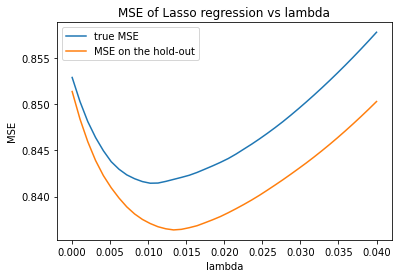

In [58]:
# plotting the results
plt.plot(lambdaL,mselist1,label='true MSE')
plt.plot(lambdaL,mselist2,label='MSE on the hold-out')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE of Lasso regression vs lambda')

In [59]:
# find the best lambda using crossing validation
best_lambda = lambdaL[np.argmin(mselist2)]
print('The best lambda obtaining by cross-validation is {best_lambda:.5f}'.format(best_lambda=best_lambda))

The best lambda obtaining by cross-validation is 0.01333
